# The Grammar of Graphics

Learning Goals
- Begin to understand what makes an effective graphic and how to represent multiple variables (potentially both numeric and categorical) on the same plot.
- Learn the rules of "the grammar of graphics."
- Create and modify a plotnine object.
- Build complex plots using a step-by-step approach following the grammar of graphics.
- Intelligently break plots into meaningful subplots to extract insights from data.
- Create scatter plots, box plots, bubble plots and lineplots.


Watch this 2006 Hans Rosling TED talk about global trends in health and ecomonmics: https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen

## Task
- Look at the graph for UN data from 1962 (at about 3 minutes into the video).  What do the axes represent?
- Comment on the following animation where the years move forward.  What is happening?  How is this expressed in the figure?
- What do different colors represent?
- What do the size of the dots represent?
- What happens in the 1980s in Bangladesh that affects fertility rates?  What happens in the 1990s with the AIDS epidemic and what does this affect according to the figure/animation?

- Consider the graph for the world distribution of income in the year 2000 (about 6 minutes into the video).
- What percentage of world income does the middle earning 60% of the world's population earn in 2000?
- Discuss the distributions for African countries versus OECD countries in 2000 and where they fall on the distribution of world income.  (Note: OECD stands for the Organization for Economic Cooperation and Development and is composed of 37 democracies with market-based economies.  The goal of the organization is to shape policies which foster prosperity, equality and opportunity.  More information can be found here: https://www.oecd.org)

- Consider the graph for GDP per capita and Child survival (at about 10 minutes into the video).
- Does the data follow a specific trend (e.g., linear, exponential, etc.)?
- When Dr. Rosling splits regional data by countries, what is revealed?  Give a specific example.
- What do the size of the dots indicate?  What do the colors of the dots indicate?
- Consider the animation that follows (at about 11:30 minutes into the video) and discuss the general trends as time moves forward.
- What how many types of information are contained in the animation?  List them (e.g., year).  Which are numeric and which are categorical?
- When Dr. Rosling adds "trails" to indicate the speed of development (at about 12:30 minutes into the video), what is revealed?  Is it better to be healthy first or wealthy first in terms of his analysis?  Which country exhibits the fastest development of the three he considers?

- Why does Dr. Rosling claim it is "dangerous to use average data?"  (At about 13:40 minutes into the video.)  Explain in terms of a specific country and its quartiles for wealth in 2003.  How does this impact policy decisions?  For example, how might it be necessary to contextualize a strategy for access to HIV preventative care in a region discussed?

- Discuss the income distribution of China and the United States, and how it changes from the 1960s on (at about 17:40 minutes into the video).  Dr. Rosling's data set ends in 1999.  What do you think has occurred in the two most recent decades?

- In closing, explain a few things that were very clearly illustrated by Dr. Rosling's graphs.  (Multiple answers are possible.)


### The Grammar of Graphics
The phrase "Grammar of Graphics" was coined by statistician Leland Wilkinson who authored a book in the 1990s with a broad impact on statistics and data science.  The book codifies a consistent way to represent and think about statistical graphs.  The grammar laid out in this book is the foundation of the R graphics package ggplot2 written by Hadley Wickham in 2005. They key idea is that graphs are broken into semantic components such as scales and layers.
Python has at least two packages that are based on ggplot2 in R: plotnine and ggplot.  For this lab, we will use plotnine.

The Grammar of Graphics always assumes the data set at hand is in "tidy" form.  This essentially means that each column holds a single variable, each row holds a single observation and each cell holds a single value.

### Task: 
Read the article "A Layered Grammar of Graphics" by Hadley Wickham.  It is available as a pdf here: https://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf.


- What are examples of aesthetics?
- What are examples of geometric objects?
- What are scales?
- What is a coordinate system?  Give an example of a coordinate system beyond the Caretsian coordinate system.
- Give two examples of statistical transformations.  Should scale transformation or statistcial transformation be performed first?
- What is faceting?
- What is a layer?  What should each layer contain? (Hint: there are four parts.)


### Solution
These are basic building blocks according to the grammar of graphics:

- data: The data + a set of aesthetic mappings that describing variables mapping
- geom: Geometric objects, represent what you actually see on the plot: points, lines, polygons, etc.
- stats: Statistical transformations, summarise data in many useful ways.
- scale: The scales map values in the data space to values in an aesthetic space, scale transformations should be performed before statistical transformations
- coord: A coordinate system, describes how data coordinates are mapped to the plane of the graphic.  Polar coordinates are an example besides Cartesian coordinates.
- facet: A faceting specification describes how to break up the data into subsets for plotting individual set

### Install and import required packages

In [ ]:
# if you have not already installed plotnine, install it
conda install -c conda-forge plotnine

In [4]:
from plotnine import *
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

### Using the miles per gallon dataset
plotnine.data contains a number of data sets.  One example was collected by the Environmental Protection Agency on different models of cars.  One variable in the data set is "displ", a car's engine size in liters, and another variable is "hwy", the car's fuel efficiency on the highway.

In [10]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


We will plot this data set where engine size is on the $x$-axis and fuel efficieny is on the $y$-axis.  The function ggplot() creates a coordinate system to which we can add layers.  The first argument of ggplot() is the dataset to use in the graph.  The function geom_point() adds a layers of points to the plot.  Each geom function takes a mapping argument to define how variables in the data set are mapped to visual properties.  The mapping argument is always paired with aes(), and the $x$ and $y$ arguments of aes() specify which variales to map to which axis.

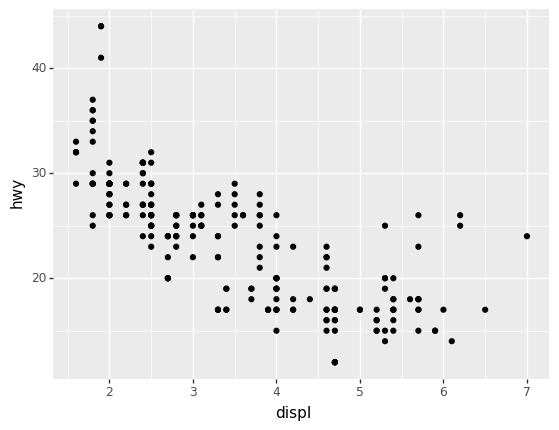

<ggplot: (8764261739210)>

In [13]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

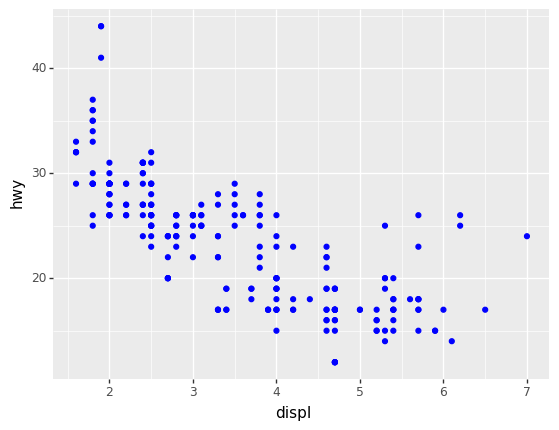

<ggplot: (8764262084271)>

In [25]:
# customize color of points
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"), color="blue")

### Task:
- Run ggplot(data=mpg).  What is returned?
- How many rows and how many columns are in the mpg data set?
- Make a scatterplot of hwy vs cyl.  Use ?mpg to determine what the variable cyl means
- Make a scatterplot of class vs drv.  Is this a useful plot?

### Solution

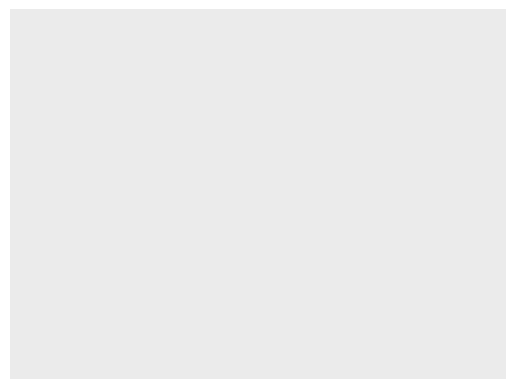

<ggplot: (8764261941833)>

In [14]:
ggplot(data=mpg)

In [16]:
# number of rows
len(mpg.axes[0])

234

In [17]:
# number of columns
len(mpg.axes[1])

11

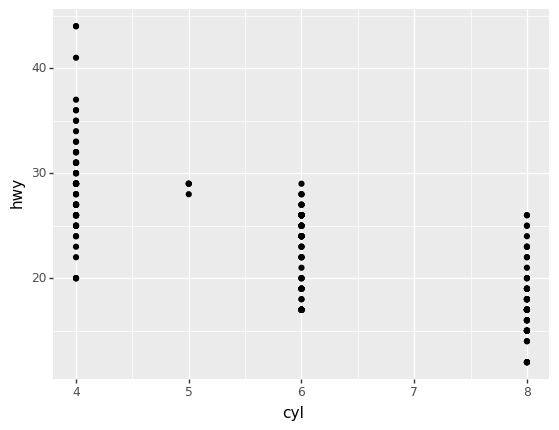

<ggplot: (8764261995746)>

In [18]:
# hwy vs cyl
ggplot(data=mpg) +\
geom_point(mapping=aes(x="cyl", y="hwy"))

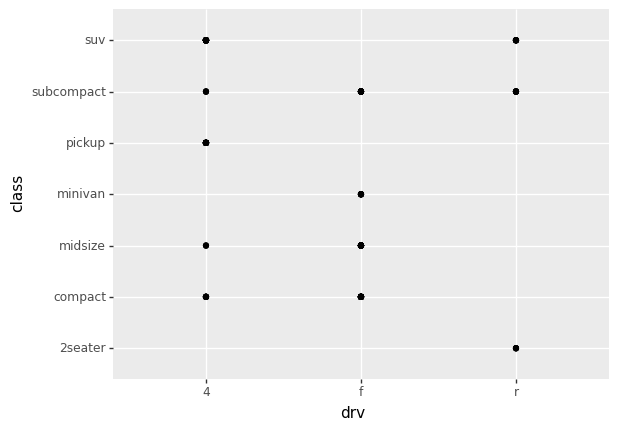

<ggplot: (8764262080781)>

In [19]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="drv", y="class"))

In [20]:
# description of data set
?mpg

The plot is not very useful because it shows car class as a function of 4 wheel drive, front wheel drive and rear rear drive.  Both axes are categorical and we are not seeing a clear pattern between the variables.

### Add another variable to the plot
If we inspect our original scatterplot, there are some points which fall between 20-30 on the hwy variable, and also have somewhat large engines (with displ between 5 and 7).  They seem to be outside of the linear trend we observed.  It's possible these are hybrids.
We can add the variable class to our scatterplot by mapping it to an aesthetic (a visual property of objects in the plot, such as size, shape, or color of the points).

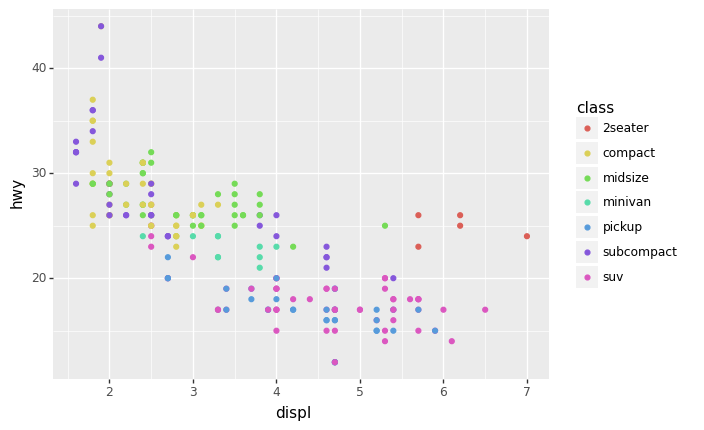

<ggplot: (8764262244988)>

In [21]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", color="class"))

In the plot above, we see that the points we were curious about are 2 seaters.  Notice that plotnine automatically added a legend to the plot that explains what each color represents.

Plotnine also lets us represent a variable with shapes or with a specific transparency.  For shapes, it will only use 13 shapes, so notice that toyota and volkswagen are not included on the plot.  Change shape to alpha to see a similar graph with varying transparency of points.

/Users/kamilalarripa/opt/anaconda3/lib/python3.9/site-packages/mizani/palettes.py:670: UserWarning: Palette can return a maximum of 13 values. 15 values requested.
/Users/kamilalarripa/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 61 rows containing missing values.
/Users/kamilalarripa/opt/anaconda3/lib/python3.9/site-packages/mizani/palettes.py:670: UserWarning: Palette can return a maximum of 13 values. 15 values requested.
/Users/kamilalarripa/opt/anaconda3/lib/python3.9/site-packages/plotnine/guides/guides.py:253: PlotnineWarning: geom_point legend : Removed 2 rows containing missing values.


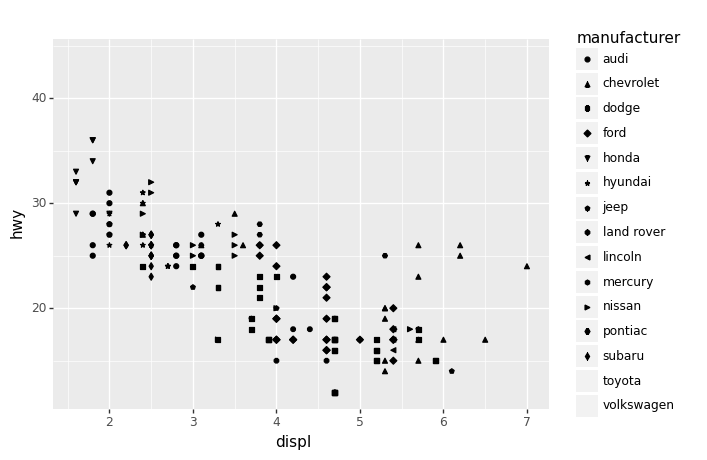

<ggplot: (8764263092303)>

In [24]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", shape="manufacturer"))

### Task:
- Which variables in mpg are categorical and which are continuous?  (Typing mpg? will help answer this.)
- Map a continuous variable to color, size and shape.  How do these aesthetics behave differently for categorical vs. continuous variables?

### Facets
We've seen that a way to add an additional variable is with aesthetics.  Another option, particularly useful for categorical variables, is to split the plot into facets.  This will create subplots that each display one subset of the data.  For example, we might choose to break out our plots by car class.  (Note: the variable we pass to facet_wrap() should be discrete.)


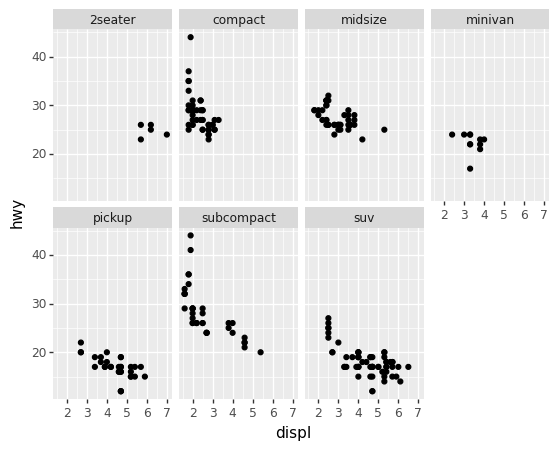

<ggplot: (8764255792445)>

In [26]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_wrap("class", nrow=2)

### Geometric Objects
A geom is a geometrical object that a plot uses to represent data.  We commonly describe plots by the type of geom used by the plot-- for example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, etc.  (Scatterplots use the point geom.)  Several geoms can be combined.  For example, the plot below shows the original scatterplot colored by class as well as a smooth line.  The second plot below breaks out drive type by color and fits a smooth line to each drive type.

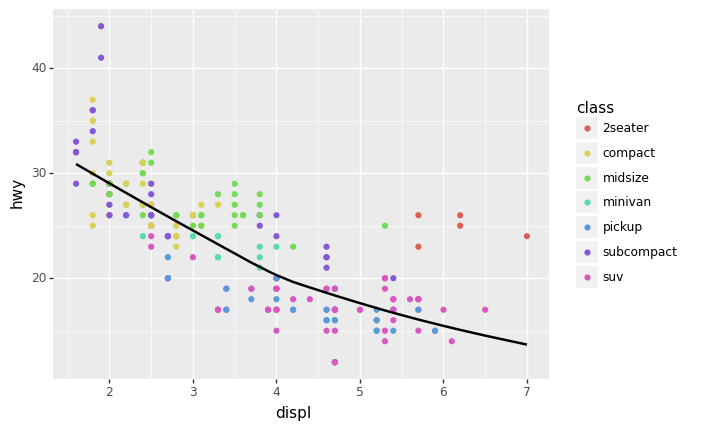

<ggplot: (8764265145968)>

In [33]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth(se=False)

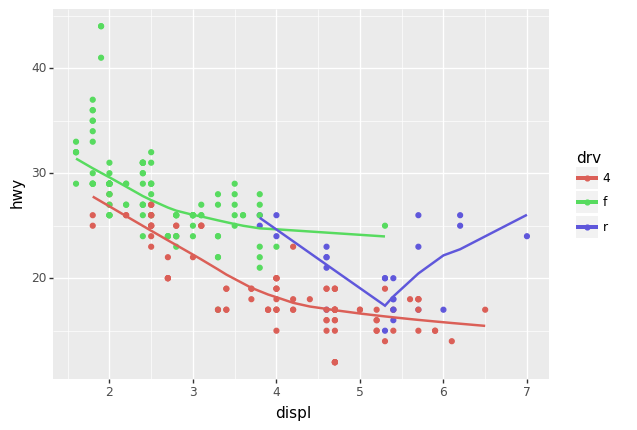

<ggplot: (8764264485075)>

In [32]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) +\
geom_point() +\
geom_smooth(se=False)

### Statistics
stat_summary() summarizes the $y$ value for each unique $x$ value plotted.

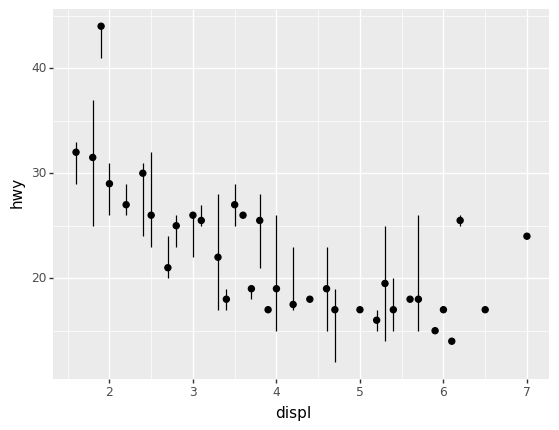

<ggplot: (8764265618044)>

In [40]:
ggplot(data=mpg) +\
stat_summary(
    mapping=aes(x="displ", y="hwy"),
    fun_ymin=np.min,
    fun_ymax=np.max,
    fun_y=np.median
)

Another useful stats tool is the boxplot, which displays the five number summary of a set of data (minimum, first quartile, median, third quartile, and maximum).

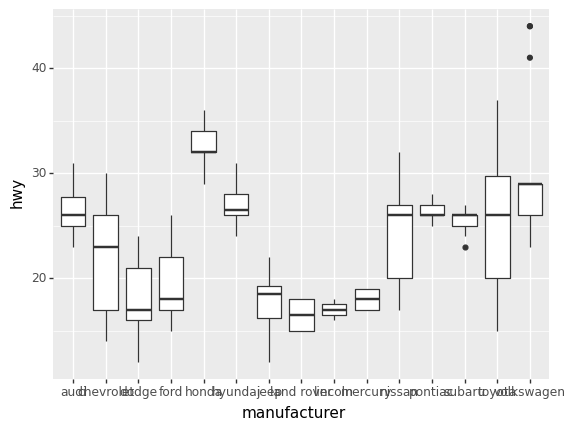

<ggplot: (8764261912567)>

In [55]:
ggplot(mpg, aes("manufacturer", "hwy")) + geom_boxplot()



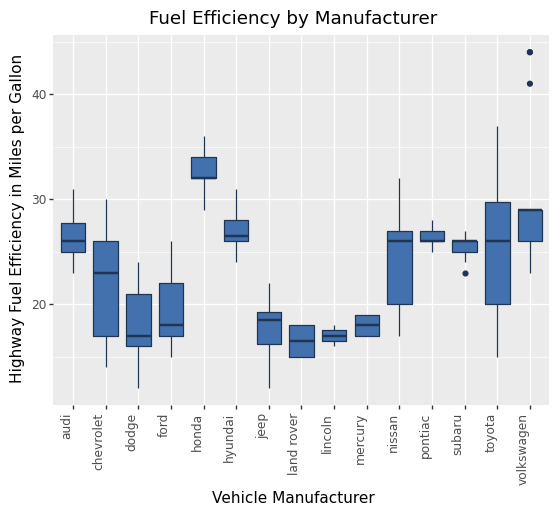

<ggplot: (8764265188015)>

In [60]:
# defining the plot to be called p10 lets us organize the iterative pieces of the plot a bit mroe
p10 = (
    ggplot(mpg, aes("manufacturer", "hwy"))
    + geom_boxplot(colour="#1F3552", fill="#4271AE") # choose a different color than default
    + xlab("Vehicle Manufacturer")
    + ylab("Highway Fuel Efficiency in Miles per Gallon")
    + ggtitle("Fuel Efficiency by Manufacturer")
    + theme(axis_text_x  = element_text(angle = 90, hjust = 1)) # rotate labels so they don't overlap
)
p10


As another example, we can visualize the number of cars in the data set made by a specific manufacturer with the stat_count() function.

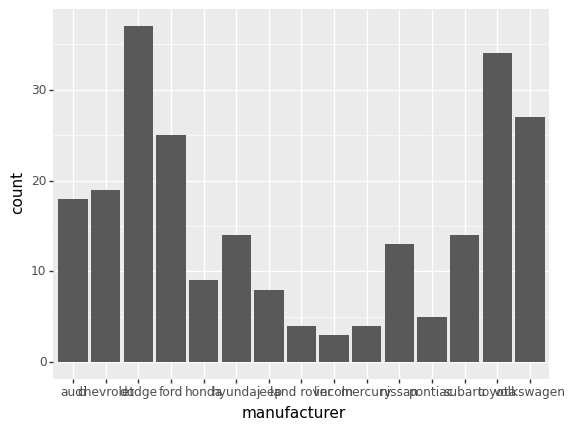

<ggplot: (8764261741276)>

In [43]:
ggplot(data=mpg) +\
stat_count(mapping=aes(x="manufacturer"))

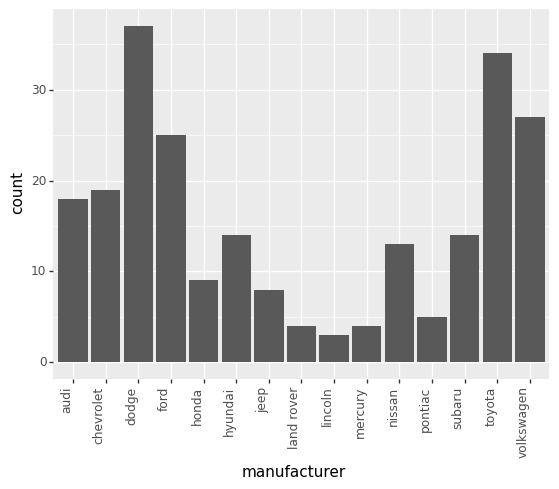

<ggplot: (8764262234362)>

In [45]:
# rotate labels on x-axis since they are unreadable in the plot above
ggplot(data=mpg) +\
stat_count(mapping=aes(x="manufacturer")) +\
theme(axis_text_x  = element_text(angle = 90, hjust = 1))

### Task: 
Hans Rosling's TED talk ends with data from 2003.  Two decades has passed, and new data is available.
Gapminder is an independent Swedish foundation with no political, religious, or economica affiliations.  It was founded in 2005 by Hans Rosling and others.  In 2007, some of its software was acquired by Google, and the Gapminder team assisted Google in improving their search to return better results for global statistics from big data providers.  Rosling and coauthors also released the book Factfulness in 2018, which became an international best seller.
Gapminder provides data curated from a number of reputable sources.  Data can be accessed on this website: https://www.gapminder.org/data/.
We have provided a csv file called gapminder_all.csv for the following questions.

- Consider the data for GDP and life expectancy in 2007.  Make a scatterplot with life expectancy as a function of GDP.  Add the variable continent as a color.  What trends do you notice?  Discuss your observations in a few sentences.
- Create a new graph (a bubble plot) with the same information as above and each country's 2007 population.  Each country's population will be represented by the size of a bubble.  A bubble plot can be created with this syntax:

ggplot(data, aes(x = x_column, y = y_column, size = size_column)) \+
geom_point(alpha = 0.7) +
scale_size_area()

- Discuss any trends you notice in the plot.
- Rename your axes appropriately


- Dr. Rosling warned us it can be dangerous to use average data and that context is important.  Therefore, instead of grouping countries by continent, let's focus on a specific continent and look at differences between countries.  Make a similar graph for only the African countries in the year 2007.  Use size of dots to represent country population, color of dots to represent different countries, and rename axes, plot title and legend titles so they are clear.  Legend labels can be renamed with labs(color = 'your name', size = 'your name').

- Repeat the task about, but this time, focus on the Americas.  Which two countries in the Americas had an extremely high GDP and an extremely high life expectancy in 2007?  Which country had a very low GDP and a very low life expectancy?

- Do you have a hypothesis about what factors impact the expected life expectancy in the countries with the two highest GDPs in 2007?  Why do you think they are ordered as they are?  (Feel free to use Google as you brainstorm.)  What about the country with the lowest GDP/life expectancy?

### Solution

In [34]:
import pandas as pd
df = pd.read_csv('gapminder_all.csv')
df.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


In [37]:
# get column names
print(df.keys())

Index(['continent', 'country', 'gdpPercap_1952', 'gdpPercap_1957',
       'gdpPercap_1962', 'gdpPercap_1967', 'gdpPercap_1972', 'gdpPercap_1977',
       'gdpPercap_1982', 'gdpPercap_1987', 'gdpPercap_1992', 'gdpPercap_1997',
       'gdpPercap_2002', 'gdpPercap_2007', 'lifeExp_1952', 'lifeExp_1957',
       'lifeExp_1962', 'lifeExp_1967', 'lifeExp_1972', 'lifeExp_1977',
       'lifeExp_1982', 'lifeExp_1987', 'lifeExp_1992', 'lifeExp_1997',
       'lifeExp_2002', 'lifeExp_2007', 'pop_1952', 'pop_1957', 'pop_1962',
       'pop_1967', 'pop_1972', 'pop_1977', 'pop_1982', 'pop_1987', 'pop_1992',
       'pop_1997', 'pop_2002', 'pop_2007'],
      dtype='object')


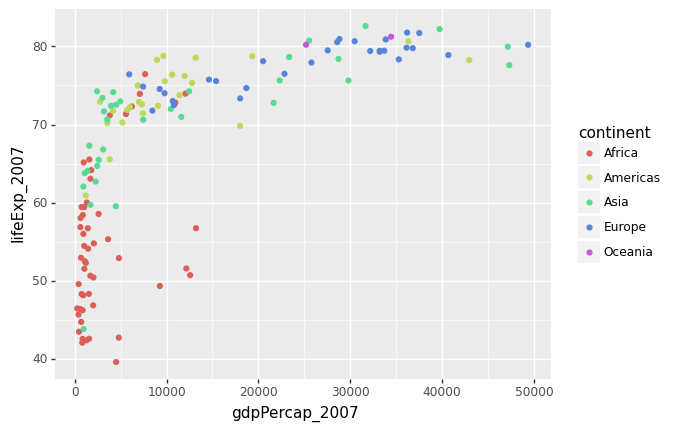

<ggplot: (8764265606069)>

In [38]:
ggplot(data=df) +\
geom_point(mapping=aes(x="gdpPercap_2007", y="lifeExp_2007", color="continent"))

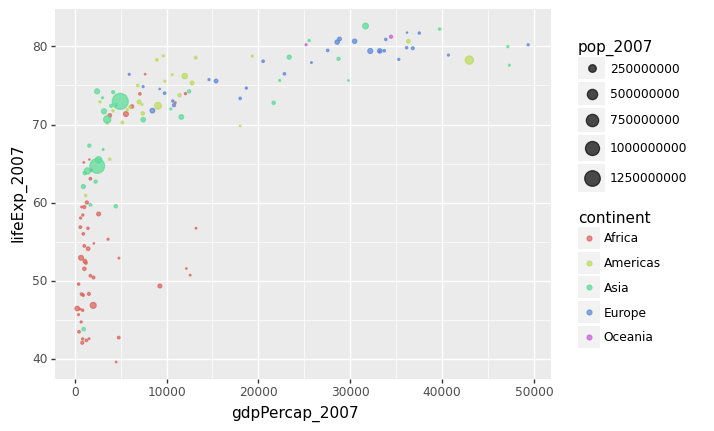

<ggplot: (8764265905917)>

In [64]:
ggplot(df, aes(x = "gdpPercap_2007", y = "lifeExp_2007", size = "pop_2007", color="continent")) +\
geom_point(alpha = 0.7) +\
scale_size_area()



In [ ]:
# change
ggplot(data=df) +\
geom_point(mapping=aes(x="gdpPercap_2007", y="lifeExp_2007", color="continent"))

In [65]:
# subset data frame to African countries
df_Africa = df.loc[df['continent'] == 'Africa']
df_Africa.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


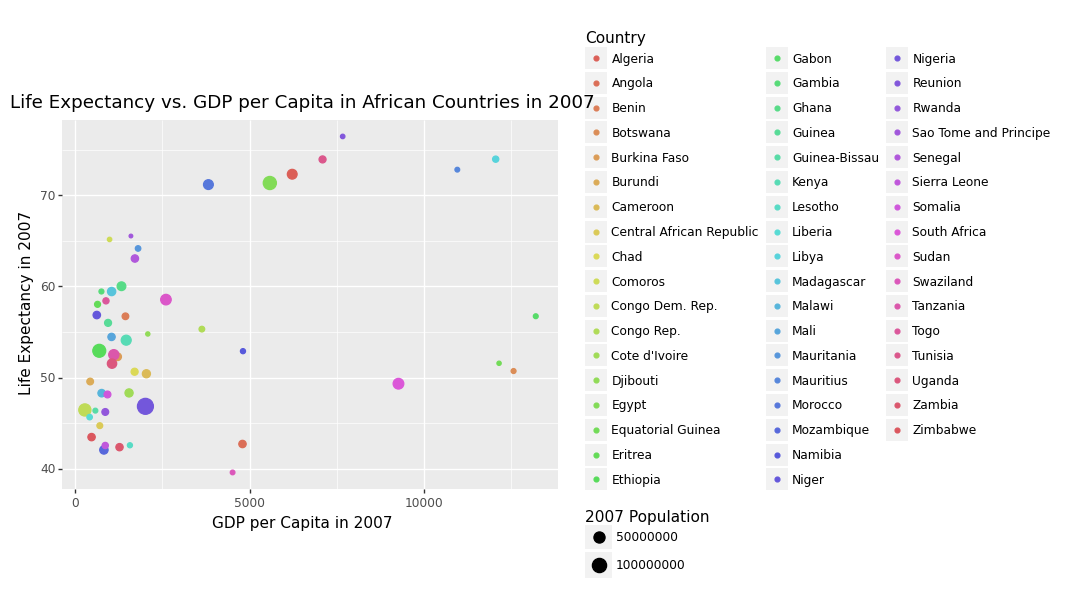

<ggplot: (8764261741186)>

In [73]:

ggplot(data=df_Africa) +\
geom_point(mapping=aes(x="gdpPercap_2007", y="lifeExp_2007", color="country", size = "pop_2007")) +\
xlab("GDP per Capita in 2007") +\
ylab("Life Expectancy in 2007") +\
ggtitle("Life Expectancy vs. GDP per Capita in African Countries in 2007") +\
labs(color = 'Country', size = '2007 Population')

In [74]:
# subset data frame to Americas countries
df_Americas = df.loc[df['continent'] == 'Americas']
df_Americas.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
52,Americas,Argentina,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,...,21283783.0,22934225.0,24779799.0,26983828.0,29341374.0,31620918.0,33958947.0,36203463.0,38331121,40301927
53,Americas,Bolivia,2677.326347,2127.686326,2180.972546,2586.886053,2980.331339,3548.097832,3156.510452,2753.691490,...,3593918.0,4040665.0,4565872.0,5079716.0,5642224.0,6156369.0,6893451.0,7693188.0,8445134,9119152
54,Americas,Brazil,2108.944355,2487.365989,3336.585802,3429.864357,4985.711467,6660.118654,7030.835878,7807.095818,...,76039390.0,88049823.0,100840058.0,114313951.0,128962939.0,142938076.0,155975974.0,168546719.0,179914212,190010647
55,Americas,Canada,11367.161120,12489.950060,13462.485550,16076.588030,18970.570860,22090.883060,22898.792140,26626.515030,...,18985849.0,20819767.0,22284500.0,23796400.0,25201900.0,26549700.0,28523502.0,30305843.0,31902268,33390141
56,Americas,Chile,3939.978789,4315.622723,4519.094331,5106.654313,5494.024437,4756.763836,5095.665738,5547.063754,...,7961258.0,8858908.0,9717524.0,10599793.0,11487112.0,12463354.0,13572994.0,14599929.0,15497046,16284741


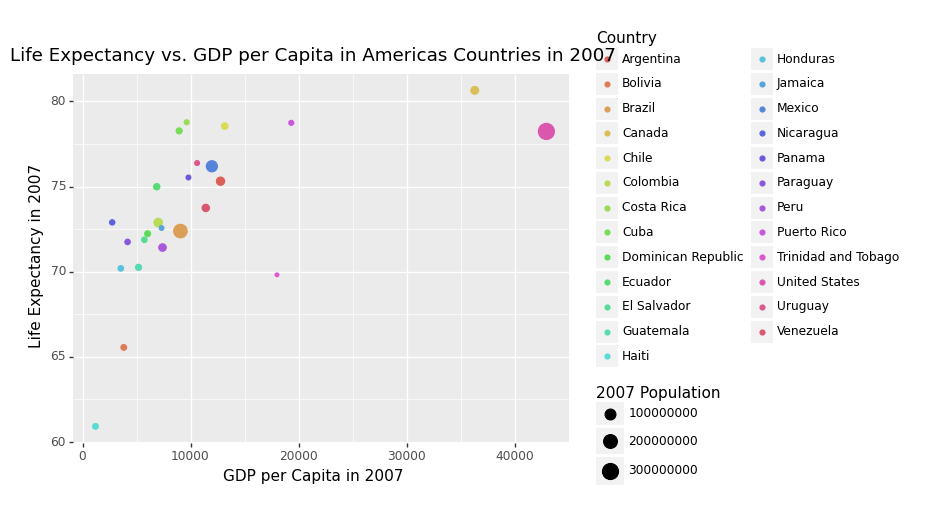

<ggplot: (8764261910369)>

In [76]:
ggplot(data=df_Americas) +\
geom_point(mapping=aes(x="gdpPercap_2007", y="lifeExp_2007", color="country", size = "pop_2007")) +\
xlab("GDP per Capita in 2007") +\
ylab("Life Expectancy in 2007") +\
ggtitle("Life Expectancy vs. GDP per Capita in Americas Countries in 2007") +\
labs(color = 'Country', size = '2007 Population')

### References
- Wickham, Hadley. "A layered grammar of graphics." Journal of Computational and Graphical Statistics 19.1 (2010): 3-28. https://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf
- Wilkinson, Leland. The grammar of graphics. Springer Berlin Heidelberg, 2012.
- Factfulness: Ten Reasons We're Wrong About the World and Why Things Are Better Than You Think by Hans Rosling and Anna Rosling Ronnlund
- Data Carpentry Tutorial: https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html
- DataCamp ggplot2 Cheat Sheet: https://res.cloudinary.com/dyd911kmh/image/upload/v1666806657/Marketing/Blog/ggplot2_cheat_sheet.pdf
- Elegant Graphics for Data Analysis, Springer 3rd edition by Hadley Wickham, Danielle Navarro, and Thomas Lin Pedersen.: https://ggplot2-book.org/index.html